# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>



For this study, we will analyse the Spain Electricity Shortfall dataset. The methodology for this project includes and not limited to exploratory data anlyses and model prediction. To perform these various tasks, the following libraries were loaded:

+ For data manipulation and analysis, Pandas and Numpy.
+ For data visualization, Matplotlib and Seaborn.
+ For data preparation, model building and evaluation, Scipy and Sklearn.


**The importation of these libraries can be seen below:**

In [2]:
# Libraries for data loading, manipulation and analysis
import numpy as np
import pandas as pd

# Libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.correlation import plot_corr

# Libraries for Data Preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Libraries for Model Building
# Example of models that could be used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Libraries for Model Evaluation
from sklearn.metrics import mean_squared_error

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

# Libraries for Saving Model
import pickle

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


The data used for this project was located in the `df_train.csv` file. To better manipulate and analyse the `df_train.csv` file, it was loaded into a Pandas Data Frame using the Pandas function, `.read_csv()` and referred to as `df`. Demonstrate which column will be the index , `index_col=False`.


In [3]:
# Loading of the data
df = pd.read_csv("df_train.csv", index_col=False)

To set the maximum number of columns to be displayed, the `pd.set_option()` function was put in place.

In [4]:
# displays unlimited number of columns
pd.set_option("display.max_columns", None)

To prevent any major unnecessary changes occurring to the original data, a copy of the dataframe was made `df.copy()` and referred to as `df_copy`.

In [14]:
# The copy of the dataframe
df_copy = df.copy()

<a id="two"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

To investigate and summarize the dataset's main characteristics, which includes data visualization methods and statistical analyses. 
Exploratory Data Analysis (EDA) gives a better understanding of the variables and the relationships between them.
 

### 3.1 Displaying the Data

The function `.head()` was used to view the first few rows of the dataset.

In [16]:
# Outputs the first 5 rows of the dataset
df_copy.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


***


+ **Results** : An unnamed column that serve as index is shown in the first column , and wil be later dropped from the dataframe as an index is already shown.The dataframe highlights various weather features of Madrid, Valencia, Bilbao, Seville and Madrid. The 3 hourly load shortfall is seen as the predictor in the last column.  Most of the columns consists solely of numeric values except Valenica wind degrees (level status) and Seville pressure (sp: Static pressure) which are categorical. These categorical values will be encoded to represent numerical values instead.  


***

### 3.2 Dropping Columns

`.drop` function is used to remove unnecessary columns.

In [17]:
# Drop unwanted column
df_copy = df_copy.drop(['Unnamed: 0'], axis=1)

In [18]:
df_copy.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


***


+ **Results** : The dataframe has a index therefore the 'Unnamed:0' column does not add value to it and subsequent possible prediction.


***

### 3.2 Data Anaylses

`.shape` function returned the number of rows by the number of columns in the dataset.

In [19]:
# Displays the number of rows and columns
df_copy.shape

(8763, 48)

***


+ **Results** : The dataset consists of 8763 rows and 48 columns.


***

`.info()` function outputs important details about the dataset. This includes the columns, the data types **(Dtype)** of the columns and the count of non-null values.

In [20]:
# Displays information about the Dataframe
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

***


+ **Results** : The `.info` function showcases the 48 columns and 8763 rows contained within the dataset. Most columns within the dataset are denoted as float64 dtype.However, Seville pressure, Valencia wind degree and the time columns are denoted as object dtype. These object dtype will eventually be converted to float64 dtypes via Dummy variable encoding.


***

### 3.3 Missing Values

Determining the missing values in the dataset is vital in accurately investigating the relationship between the variables. If not handled correctly it could cause: 
+ Reduction in the power/fit of the model.
+ Have it become a biased model. 

In [22]:
# Outputs the number of missing values
values = pd.DataFrame(df_copy.isnull().sum(), columns=['nulls'])

# Displays the percentage of missing values within the dataset
values["%_of_nulls"]=round(df_copy.isnull().sum()/len(df_copy)*100)
values

,nulls,%_of_nulls
time,0,0.0
Madrid_wind_speed,0,0.0
Valencia_wind_deg,0,0.0
Bilbao_rain_1h,0,0.0
Valencia_wind_speed,0,0.0
Seville_humidity,0,0.0
Madrid_humidity,0,0.0
Bilbao_clouds_all,0,0.0
Bilbao_wind_speed,0,0.0
Seville_clouds_all,0,0.0


***


+ **Results** : The above code highlights that the Valencia pressure column is the only column with missing value as its rows consists of 2068 missing values. It can further be said that the column has 24% of the missing values.


***

### 3.4 Descriptive Statistics

Statistical analyses in EDA is crucial for analysing the dataset. The function `.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables in our dataframe.

In [23]:
# Displays the summary statistics
df_copy_transposed = df_copy.describe().T

df_copy_transposed

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


***


+ **Results** : The descriptive statistics table above highlghts the various cities and their weather categories i.e. temperature, rain, wind, snow etc. The cities are shown to have similar values in regards to their weather categories e.g. minimum rain in Seville and Barcelona etc. A zero value within a row, specify that the particular weather category did not occur for that city.


***

### 3.5  Kurtosis and Skewness

To give additional information about the distribution of our dataset, we had a look at the Skewness (`.skew()`)
and the kurtosis (`.kurtosis()`) functions respectively. Skewness is defined by its measure of its asymmetry in a probability distribution whereas kurtosis describes the lack or heaviness of the tail (outliers) when compared to normal distribution.

In [47]:
# Skewness of the dataframe
df_copy.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

***


+ **Results** : Features that are fairly symmetrical such as the target variable, load_shortfall_3h falls within the range -0.5 < x < 0.5. 


***

In [48]:
# Kurtosis of the dataframe
df_copy.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

***


+ **Results** : Kurtosis with a high number of outliers is measured by the features having >3 and thus can be seen in this dataset. 


***

### 3.6 Data Visualization of relevant feature interactions

The following plots displays the various relationships between the types of time measures, features and the load shortfall.

#### 3.6.1 The Numerical Feature Distributions

To investigate the distribution of the various numerical features, `.hist()` method was demonstrated.

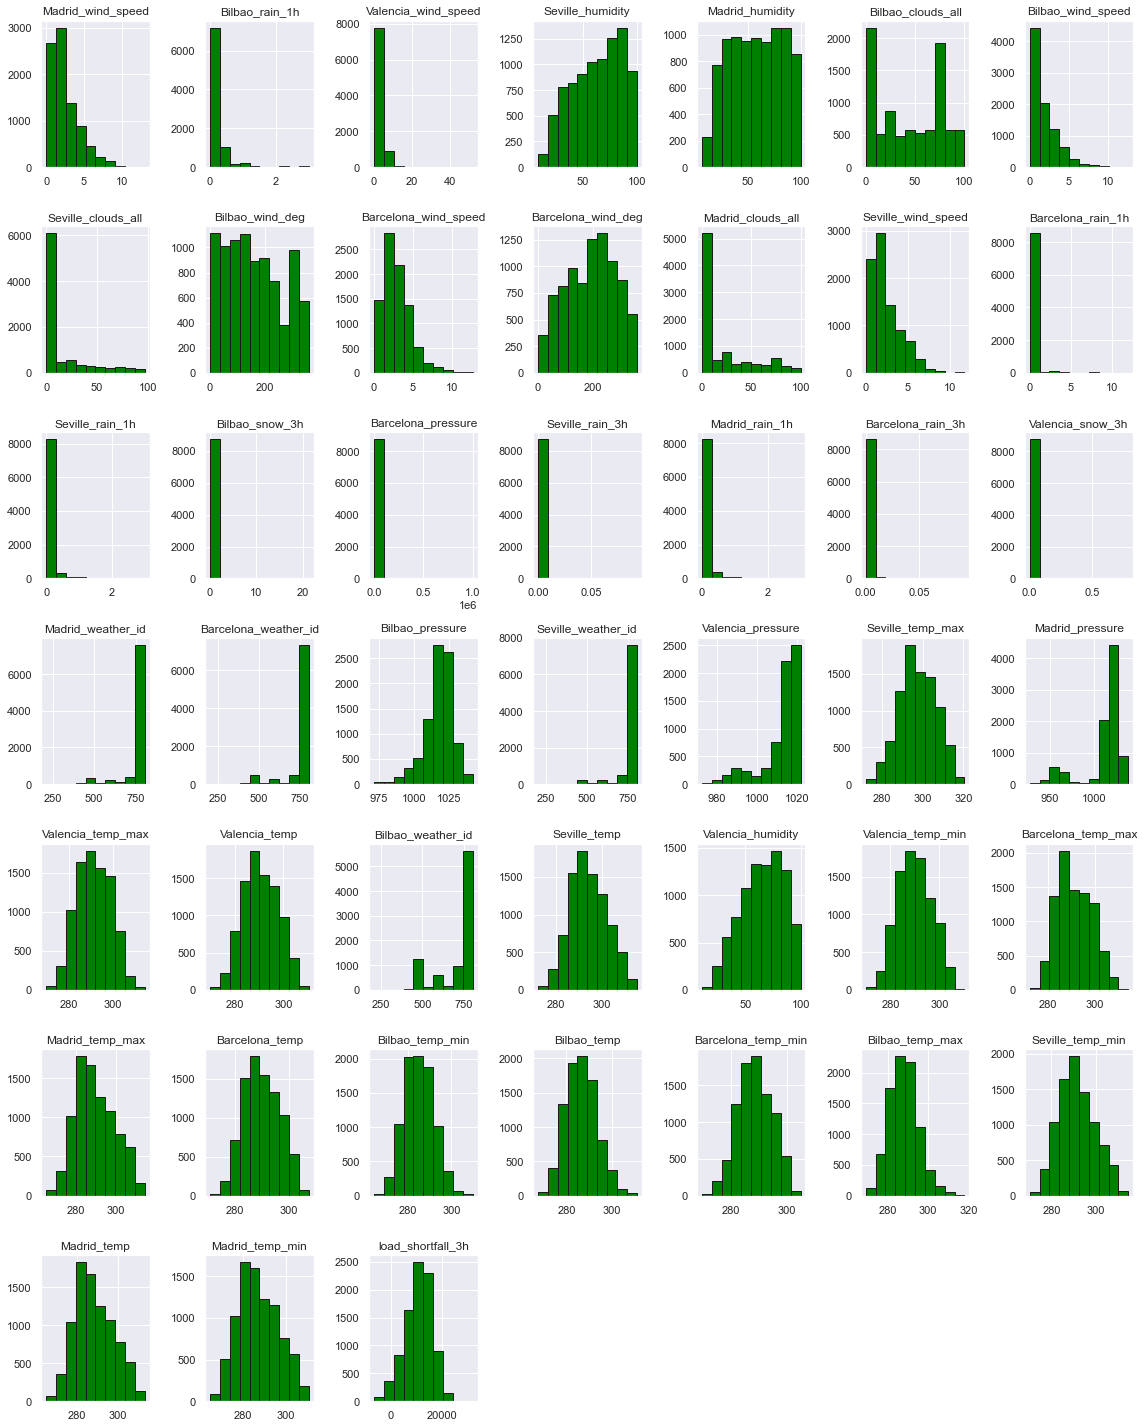

In [85]:
# Displaying the columns with numerical values
y_col = df_copy.select_dtypes(include="float64").columns

# Adjust padding between/around subplots and set figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Creating the plot
axs = df_copy[y_col].hist(figsize=(16, 20),color='green', ec='k')

# Showing the plot
plt.show()

***


+ **Results** : As seen above, the load shortfall is shown to have a fairly symmetrical distribution, which has also been highlighted in `.skew()` method. There are few features such as rain that our heavily skewed as they consist of zero values and has also been demonstrated in the summary statistics (`.describe` method).


***

#### 3.6.2 The Categorical Feature Distributions

The load shortfall's relationship with the categorical features i.e. Seville pressure and Valencia wind degree was analysed using `sns.catplot`.

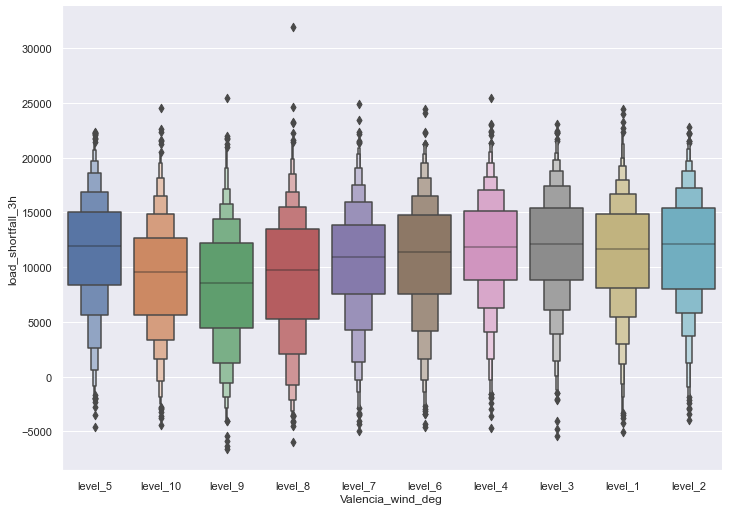

In [126]:
# Displays the relationship between the load shortfall and Valencia wind degrees

sns.catplot(data=df_copy,x="Valencia_wind_deg", y="load_shortfall_3h", kind="boxen",
            height=7.27, aspect=11.7/8.27)



***


+ **Results** : 


***

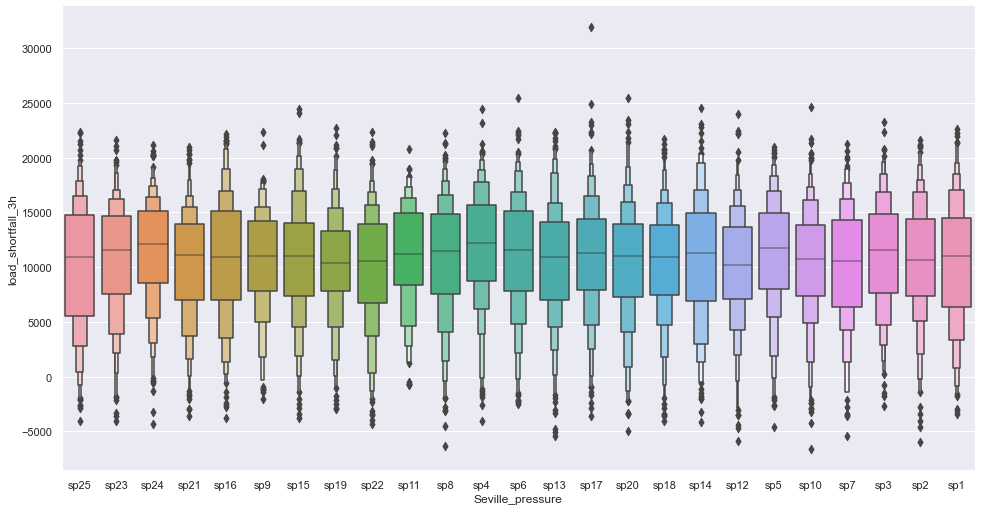

In [125]:
# Displays the relationship between the load shortfall and Seville Pressure

sns.catplot(data=df_copy,x="Seville_pressure", y="load_shortfall_3h", kind="boxen",
            height=7.27, aspect=15.7/8.27)

***


+ **Results** : 


***

#### 3.6.3 The graphical representation of the load_shortfall_3h over time. 

By using the `sns.lineplot()` plot we can categorise the load shortfall dataset's time frame.

Text(0, 0.5, 'Load_shortfall_3h')

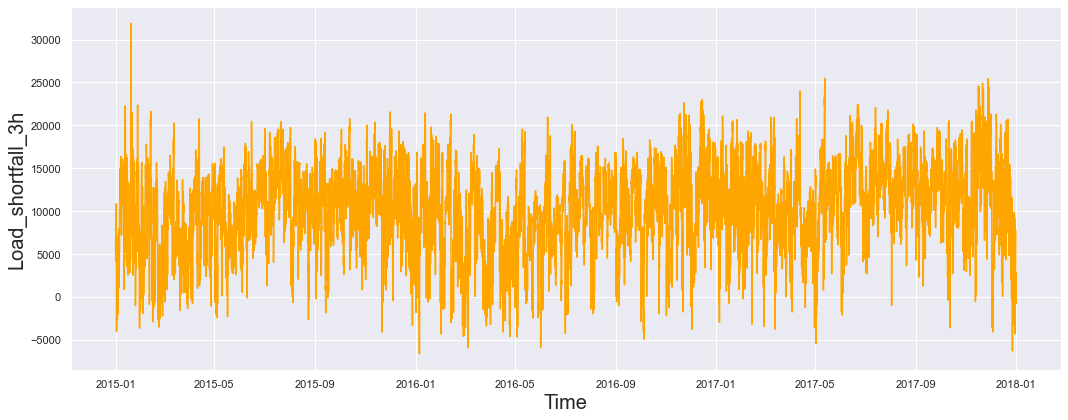

In [214]:
# Create plot
fig,ax = plt.subplots( 1, 1, figsize = ( 15, 6))
sns.lineplot( x = "time", y = "load_shortfall_3h",
            color = 'orange', data = df_copy, ax = ax)

# Set labels
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Load_shortfall_3h', fontsize=20)

# Show Plot
plt.show()

***


+ **Results** : 


***

#### 3.6.4 The `load_shortfall_3h` vs the `month`

The `sns.lineplot()` below represents the load shortfall during the months of the year.

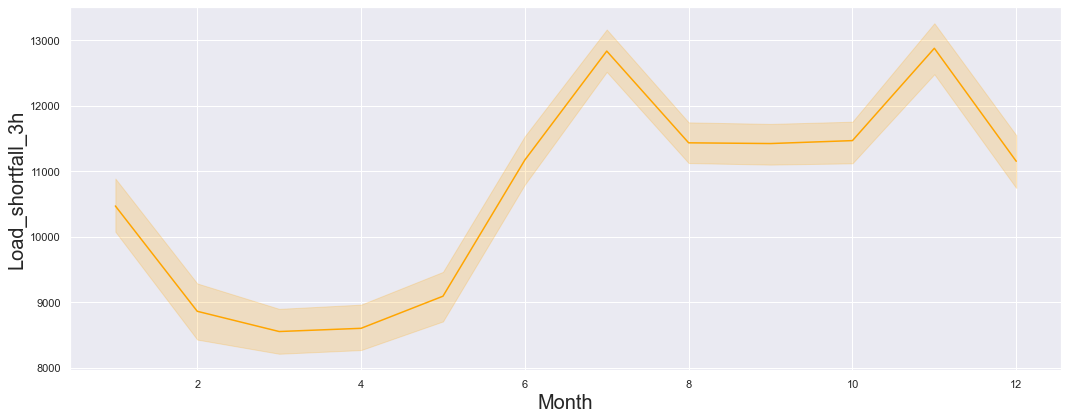

In [228]:
# Create plot
fig,ax = plt.subplots( 1, 1, figsize = ( 15, 6))
sns.lineplot( x = "Month", y = "load_shortfall_3h",
            color = 'orange', data = df_copy,
            ax = ax)

# Set labels
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Load_shortfall_3h', fontsize=20)

# Show Plot
plt.show()

***


+ **Results** : 


***

#### 3.6.5 The `load_shortfall_3h` vs the `Start_weekday`

The `sns.lineplot` below displays the load shortfall's change during the week days.

Encoded as : `0:Monday`; `1:Tuesday`; `2:Wednesday`; `3:Thursday`; `4:Friday`; `5:Saturday`; `6:Sunday` 

Text(0, 0.5, 'Load_shortfall_3h')

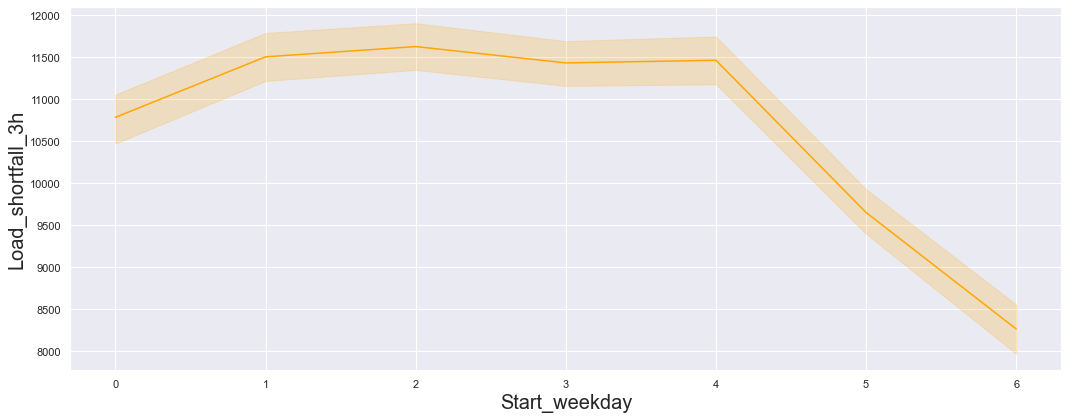

In [243]:
# Create plot
fig,ax = plt.subplots( 1, 1, figsize = ( 15, 6))
sns.lineplot( x = "Start_weekday", y = "load_shortfall_3h",
            color = 'orange', data = df_copy,
            ax = ax)

# Set labels
ax.set_xlabel('Start_weekday', fontsize=20)
ax.set_ylabel('Load_shortfall_3h', fontsize=20)

# Show Plot
plt.show()

***


+ **Results** : 


***

#### 3.6.6 The `load_shortfall_3h` vs the `start_hour`

The `sns.lineplot` below displays the load shortfall's shift in hourly time.

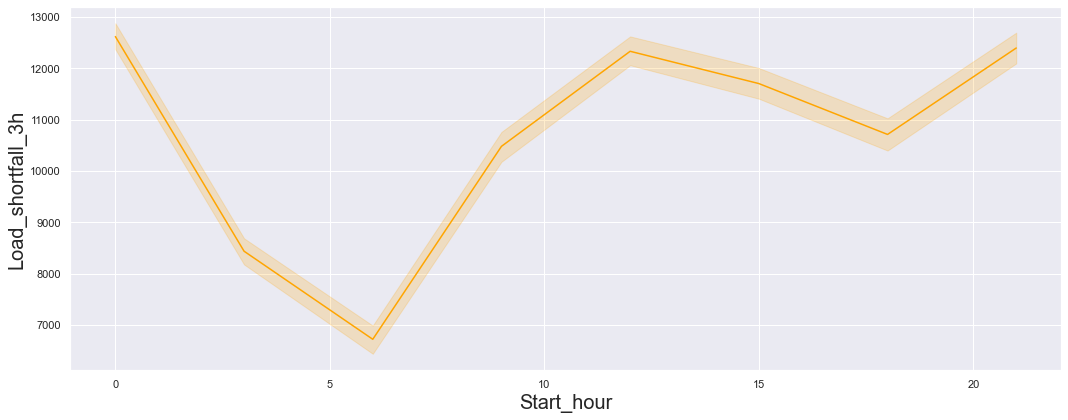

In [244]:
#Create plot
fig,ax = plt.subplots( 1, 1, figsize = ( 15, 6))
sns.lineplot( x = "Start_hour", y = "load_shortfall_3h",
            color = 'orange', data = df_copy,
            ax = ax)

# Set labels
ax.set_xlabel('Start_hour', fontsize=20)
ax.set_ylabel('Load_shortfall_3h', fontsize=20)

# Show Plot
plt.show()

***


+ **Results** : 


***

### 3.7 Correlation 

The figure below shows the relationships between the various features using a correlation heatmap (`sns.heatmap()`).

In [170]:
# Correlation matrix

# Plot dimensions
fig = plt.figure(figsize=(16,15), dpi = 480)
ax = fig.add_subplot(1, 1, 1)

# Create Plot
sns.heatmap(df_copy.corr(), ax = ax, vmin=-1, vmax=1)

# Show Plot
plt.show()

***


+ **Results** : 


***

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



### 4.1 Dealing with Missing Values 

The feature, Valencia_pressure consists of missing values and therefore, the rows require numerical values in order for a model to be trained on.

In [166]:
# Fill in the missing values using the median
df_copy['Valencia_pressure'] = df_copy.Valencia_pressure.fillna(df_copy.Valencia_pressure.median())

In [168]:
# check if the above code worked
df_copy.isnull().sum()

time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_temp_max      0
Madrid_temp_

***


+ **Results** : The median was used to fill in the missing values of the column , Valencia pressure. Median has shown to be more robust in regards to extreme outliers.


***

### 4.2 Creating New Features

The `.to_datetime()` method converts the string object dtype of the *time* column into a date time object dtype. 

In [40]:
# Displays the conversion into a datetime object
df_copy['time']=pd.to_datetime(df_copy['time'])

df_copy.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
8758   2017-12-31 09:00:00
8759   2017-12-31 12:00:00
8760   2017-12-31 15:00:00
8761   2017-12-31 18:00:00
8762   2017-12-31 21:00:00
Name: time, Length: 8763, dtype: datetime64[ns]

***


+ **Results** :  The dtype for time is converted to datetime64[ns], a numeric data type.


***

The below code creates new features from the existing time feature column. 

In [41]:
# Creates new features of the time column

# Day
df_copy['Day'] = df_copy['time'].dt.day

# Month
df_copy['Month'] = df_copy['time'].dt.month

# Year
df_copy['Year'] = df_copy['time'].dt.year

# Hour
df_copy['Start_hour'] = df_copy['time'].dt.hour

# Minute
df_copy['Start_minute'] = df_copy['time'].dt.minute

# Second
df_copy['Start_second'] = df_copy['time'].dt.second

# Monday is 0 and Sunday is 6
df_copy['Start_weekday'] = df_copy['time'].dt.weekday


In [43]:
df_copy.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,1,1,2015,3,0,0,3
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,1,1,2015,6,0,0,3
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,1,1,2015,9,0,0,3
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,1,1,2015,12,0,0,3
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,1,1,2015,15,0,0,3


***


+ **Results** :  Several features such as `Day`, `Month`, `Year` etc were created and added to te dataframe. 
These features allow for easy accesibility to information used in graphical plots and modelling.


***

### 4.3 Engineer existing features

***


+ **Results** : 


***

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


### 5.1 Splitting the Dataset

***


+ **Results** : 


***

### 5.2 Standardization

***


+ **Results** : 


***

### 5.3 Train-Test Split

***


+ **Results** : 


***

### 5.4 Machine Learning Models

#### 5.4.1 Linear Regression

***


+ **Results** : 


***

#### 5.4.2 Decision Tree

***


+ **Results** : 


***

#### 5.4.3 Ridge Regression

***


+ **Results** : 


***

#### 5.4.4 Lasso Regression

***


+ **Results** : 


***

### 5.5 Evaluation of the Machine Learning Models

***


+ **Results** : 


***

In [ ]:
# create targets and features dataset

### 5.6 Test the model on the test dataset

In [ ]:
#Loading the dataset
#df_test = pd.read_csv('df_test.csv')

***


+ **Results** : 


***

<a id="five"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Determine using the RMSE

In [ ]:
# Compare model performance

***


+ **Results** : 


***

### 6.1 Chosen Model will be tested on the Test Dataset

In [ ]:
# Choose best model and motivate why it is the best choice

***


+ **Results** : 


***

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

***


+ **Conclusion** : 


***